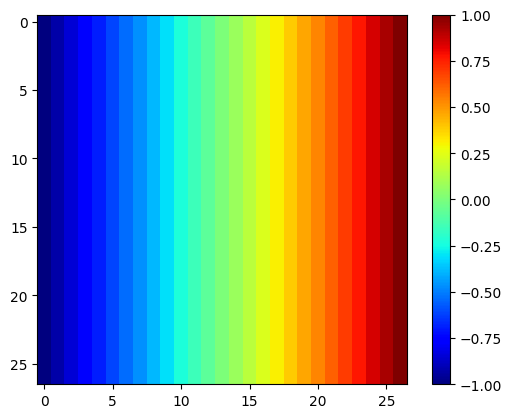

In [9]:
import numpy as np
import matplotlib.pyplot as plt


# init
s = 27
MAT = np.zeros((s, s))
# set boundary conditions
MAT[0, :] = np.linspace(-1, 1, s)
MAT[-1, :] = np.linspace(-1, 1, s)
MAT[:, 0] = -np.ones(s)
MAT[:, -1] = np.ones(s)


def relaxation(mat: np.ndarray, tol=1e-10, maxiter=1000) -> np.ndarray:
    """
    Relaxation method for solving Laplace's equation.
    mat: initial guess
    tol: tolerance
    maxiter: maximum number of iterations
    """
    mat_new = mat.copy()

    for i in range(maxiter):
        mat_new[1:-1, 1:-1] = 0.25 * (mat_new[:-2, 1:-1] + mat_new[2:, 1:-1] + mat_new[1:-1, :-2] + mat_new[1:-1, 2:])  # update interior points

        if np.max(np.abs(mat_new - mat)) < tol:
            break

        mat = mat_new.copy()

    return mat_new


MAT = relaxation(MAT)

# color map
fig, ax = plt.subplots()
im = ax.imshow(MAT, cmap='jet')
fig.colorbar(im, ax=ax)
plt.show()
